<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Manuel/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [ ]:
#Select the frim for the prediction
firm = "AAPL"

# Apple -> AAPL
# Microsoft -> MSFT
# Nvidia -> NVDA
# Adobe -> ADVE
# Tesla -> TSLA
# Amazon -> AMZN
# Netflix -> NFLX
# Meta -> META
# Alphabet -> GOOGL

In [ ]:
!pip install yfinance==0.2.54
!pip install requests-cache

import requests_cache
session = requests_cache.CachedSession(cache_name='yfinance_cache', backend='sqlite', expire_after=3600)

In [ ]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

Apple Inc.


# Data Collection

### Stock Price

In [ ]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-20 00:00:00-05:00,78.295541,78.785750,77.222897,77.730095,100566000,0.0,0.0
2020-02-21 00:00:00-05:00,77.322373,77.766480,75.351821,75.970650,129554000,0.0,0.0
2020-02-24 00:00:00-05:00,72.138777,73.818112,70.190065,72.362038,222195200,0.0,0.0
2020-02-25 00:00:00-05:00,73.034258,73.417688,69.437753,69.910973,230673600,0.0,0.0
2020-02-26 00:00:00-05:00,69.534818,72.289226,69.527537,71.020012,198054800,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-12 00:00:00-05:00,231.199997,236.960007,230.679993,236.869995,45243300,0.0,0.0
2025-02-13 00:00:00-05:00,236.910004,242.339996,235.570007,241.529999,53614100,0.0,0.0
2025-02-14 00:00:00-05:00,241.250000,245.550003,240.990005,244.600006,40896200,0.0,0.0


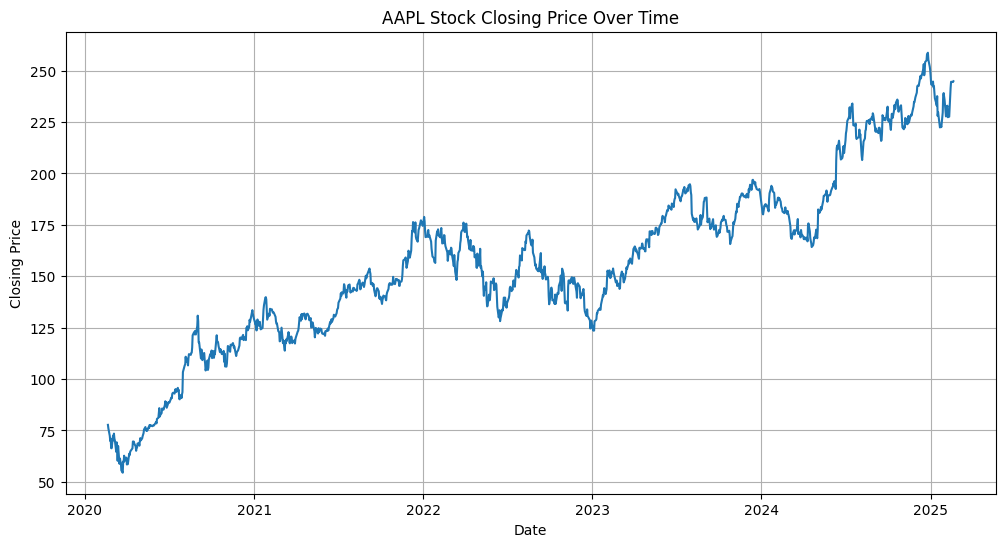

In [ ]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [ ]:
!pip install fredapi
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.682,716388.0,102.5873,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.081,720393.0,102.1219,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.229,725079.0,101.9736,1305.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [ ]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2024-09-30,0.0,0.241,134661000000.0,93736000000.0,11445000000.0,210352000000.0,134661000000.0,123216000000.0,NaN,NaN,...,-1046000000.0,-5144000000.0,-3788000000.0,-2266000000.0,11688000000.0,NaN,NaN,11445000000.0,11445000000.0,93736000000.0
2023-09-30,0.0,0.147,125820000000.0,96995000000.0,11519000000.0,214137000000.0,125820000000.0,114301000000.0,-183000000.0,3933000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
2022-09-30,0.0,0.162,130541000000.0,99803000000.0,11104000000.0,223546000000.0,130541000000.0,119437000000.0,-106000000.0,2931000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2021-09-30,0.0,0.133,123136000000.0,94680000000.0,11284000000.0,212981000000.0,123136000000.0,111852000000.0,198000000.0,2645000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890000000.0,2873000000.0,...,NaN,NaN,NaN,NaN,NaN,-215000000.0,-215000000.0,NaN,NaN,NaN


In [ ]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Interest Income Non Operating',
 'Operating Income',
 'Operating Expense',
 'Research And Development',
 'Selling General And Administr

### Sentiment Analysis

##### yhfinance web scrapping

##### Reddit seb scrapping

In [ ]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

In [ ]:

!pip install asyncpraw

import asyncpraw #Library for Reddit API
import asyncio # for async environment
import nest_asyncio # Preventing async loop error
import re

nest_asyncio.apply() # Preventing async loop error

#API certification
async def fetch_reddit():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    subreddit = await reddit.subreddit(f"{re.sub(r'[^A-Za-z0-9 ]+', '', firm_name.split(' ')[0]) }")  # await for async environment

    # list
    data = []

    async for post in subreddit.hot(limit=10):  # Top 10 posts
        data.append({
            "Title": post.title,
            "Score": post.score,
            "URL": post.url,
            "Content": post.selftext[:500] #Limit 500 words. revise possible
        })

    await reddit.close()  # await for api calling

    # DataFrame
    df = pd.DataFrame(data)
    return df

# Execution
loop = asyncio.get_event_loop() # Preventing async loop error
loop.run_until_complete(fetch_reddit())

,Title,Score,URL,Content
0,"Daily Advice Thread - February 19, 2025",6,https://www.reddit.com/r/apple/comments/1it2wd...,Welcome to the Daily Advice Thread for /r/Appl...
1,Apple Polishing Cloth adds support for the new...,3710,https://www.apple.com/shop/product/MW693AM/A/p...,
2,16e launched,3562,https://www.apple.com/shop/buy-iphone/iphone-16e,
3,Apple debuts iPhone 16e: A powerful new member...,1040,https://www.apple.com/newsroom/2025/02/apple-d...,
4,"Apple reveals C1, its first in-house 5G iPhone...",828,https://9to5mac.com/2025/02/19/apple-reveals-c...,
5,Apple No Longer Offers Any Devices in (PRODUCT...,380,https://www.macrumors.com/2025/02/19/apple-con...,
6,iPhone 16e misses out on Ultra Wideband chip,576,https://www.apple.com/iphone/compare/?modelLis...,
7,No More 64GB Storage - iPhones Now Start With ...,370,https://www.macrumors.com/2025/02/19/iphones-n...,
8,iPhone 16e Doesn't Have MagSafe,526,https://www.macrumors.com/2025/02/19/iphone-16...,
9,Wireless reverse charging being tested in the ...,741,https://9to5mac.com/2025/02/19/wireless-revers...,


02.10 Ri-on: Added draft for web scrapping reddit posts

In [ ]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list,
                                     "Title": article_title_list,
                                     "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,6 hours ago,"Fed minutes, lagging Mag 7, short sellers: Mar...",The S&P 500 (^GSPC) reached a new record close...
1,12 hours ago,"Instagram upgrades DMs with music sharing, mes...","Instagram is upgrading its direct messages, al..."
2,16 hours ago,iPhone SE 4 could be a huge moneymaker for Apple,It pays to sell a cheap iPhone if you are tech...
3,26 minutes ago,Apple Inc. (AAPL) Faces Potential Price Hikes ...,We recently compiled a list of the 15 AI Stock...
4,2 hours ago,Alibaba’s $110 Billion Rally on AI Optimism Fa...,(Bloomberg) -- Alibaba Group Holding Ltd. face...
5,2 hours ago,Trump’s FBI Pick Stands to Make Millions From ...,Kash Patel is in line for Senate confirmation ...
6,6 hours ago,X Hinted at Possible Deal Trouble in Talks Wit...,Interpublic Group recently signed an advertisi...
7,7 hours ago,"Apple Launches New, Cheaper Phone. It Will Run...","Apple announced its latest, lower-priced iPho..."
8,7 hours ago,"These Stocks Moved the Most Today: Nvidia, Ets...","Bumble stock plunges after an earnings miss, M..."
9,7 hours ago,Apple Introduces New Low-Cost iPhone To Boost ...,"Apple announced a new budget smartphone, calle..."


02.10 Ri-on: I successfully set up a system to search for articles related to a specified company and extract the title, posting time, and summary in the yahoo finance website. However, the scraping currently only captures the articles displayed at the top of the webpage. To retrieve older data, further improvements are needed.

Attempted fix at yahoo, changing max articles to 10000

In [ ]:
import requests
from datetime import datetime

def get_yahoo_news(firm, max_articles=10000):                          # adjust max articles here
    base_url = "https://query2.finance.yahoo.com/v1/finance/search"
    articles = []
    offset = 0

    while len(articles) < max_articles:
        params = {
            "q": firm,
            "news_count": min(100, max_articles - len(articles)),  # API max per call
            "offset": offset,
            "lang": "en-US",
            "region": "US"
        }

        response = requests.get(
            url=base_url,
            params=params,
            headers={"User-Agent": "Mozilla/5.0"}
        )

        if response.status_code != 200 or not response.json().get('news'):
            break

        for article in response.json()['news']:
            # Use get method with a default value to handle missing 'summary' key
            summary = article.get('summary', 'N/A')
            articles.append({
                "Time": datetime.fromtimestamp(article['providerPublishTime']).strftime('%Y-%m-%d %H:%M'),
                "Title": article['title'],
                "Summary": summary,  # Assign the extracted or default summary
                "Source": article['publisher']
            })

        offset += params["news_count"]

    return pd.DataFrame(articles)[:max_articles]

# Usage
yh_article_df = get_yahoo_news(firm) # specify the firm parameter to get news of the specified firm.
yh_article_df

,Time,Title,Summary,Source
0,2025-02-20 04:05,Apple Inc. (AAPL) Faces Potential Price Hikes ...,N/A,Insider Monkey
1,2025-02-20 02:17,Alibaba’s $110 Billion Rally on AI Optimism Fa...,N/A,Bloomberg
2,2025-02-20 02:00,Trump’s FBI Pick Stands to Make Millions From ...,N/A,The Wall Street Journal
3,2025-02-19 22:28,"Fed minutes, lagging Mag 7, short sellers: Mar...",N/A,Yahoo Finance Video
4,2025-02-19 22:17,X Hinted at Possible Deal Trouble in Talks Wit...,N/A,The Wall Street Journal
...,...,...,...,...
9995,2025-02-19 22:28,"Fed minutes, lagging Mag 7, short sellers: Mar...",N/A,Yahoo Finance Video
9996,2025-02-19 22:17,X Hinted at Possible Deal Trouble in Talks Wit...,N/A,The Wall Street Journal
9997,2025-02-19 21:30,"Apple Launches New, Cheaper Phone. It Will Run...",N/A,Barrons.com
9998,2025-02-19 21:19,"These Stocks Moved the Most Today: Nvidia, Ets...",N/A,Barrons.com


this method uses API instead of webscraping, but we're still limited to the most recent articles. Yahoo api doesnt allow for more than 5 years


#### Testing out different news API's

##### TheNewsAPI

In [ ]:
!pip install newsapi-python
import newsapi
import requests

api_key = 'VZnchCBfCg9fBUkfCR2llXDWIiTKRaK2iAIaboO5'

def get_historical_news(firm, years_back=5):
    """Retrieve news articles from past specified years using TheNewsAPI"""
    end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
    start_date = pd.Timestamp.now() - pd.DateOffset(years=years_back)
    start_date = start_date.strftime('%Y-%m-%d')

    all_articles = []
    page = 1

    while True:
        params = {
            'api_token': api_key,
            'q': firm,
            'search_in': 'title,description',
            'from': start_date,
            'to': end_date,
            'language': 'en',
            'sort': 'published_at',
            'order': 'desc',
            'page': page,
            'domains': 'reuters.com,bloomberg.com,finance.yahoo.com'
        }

        response = requests.get('https://api.thenewsapi.com/v1/news/all', params=params)

        if response.status_code != 200:
            print(f"Error: {response.status_code}")
            break

        data = response.json()

        if not data['data']:
            break

        all_articles.extend(data['data'])
        page += 1

        # Free tier limit: 100 results
        if len(all_articles) >= 100 or page > 5:
            break

    return pd.DataFrame(all_articles)[['published_at', 'title', 'description', 'url']]

# Usage - get Negirmtflix articles from past 5 years
news_df = get_historical_news(firm_name, years_back=5)
print(f"Found {len(news_df)} articles")
news_df.head()


Found 15 articles


,published_at,title,description,url
0,2025-02-20T03:58:40.000000Z,"Codelco, Anglo American set to jointly operate...",Chilean state-run copper giant Codelco and Lon...,https://finance.yahoo.com/news/codelco-anglo-a...
1,2025-02-20T03:08:02.000000Z,"In a major shift, Japex to prioritise oil and ...",Japan Petroleum Exploration (Japex) is priorit...,https://finance.yahoo.com/news/major-shift-jap...
2,2025-02-20T02:45:11.000000Z,Oil prices ease after report of US crude inven...,Oil prices edged lower on Thursday after an in...,https://finance.yahoo.com/news/oil-prices-ease...
3,2025-02-20T02:09:21.000000Z,US regulators approve Venture Global increase ...,U.S. federal regulators on Wednesday gave Vent...,https://finance.yahoo.com/news/us-regulators-a...
4,2025-02-19T23:09:50.000000Z,"Exxon, SLB flag interest in lithium projects i...",U.S. oil major Exxon Mobil is planning a meeti...,https://finance.yahoo.com/news/exxon-slb-flag-...


##### Yfinance with 10k articles but with firm name

In [ ]:
import requests
from datetime import datetime, timedelta

def get_yahoo_news(firm, years_back=5, max_articles=10000):
    """Retrieve historical news articles from Yahoo Finance API"""
    base_url = "https://query2.finance.yahoo.com/v1/finance/search"
    articles = []
    offset = 0
    retrieved = 0

    start_date = (datetime.now() - timedelta(days=365*years_back)).timestamp()

    while retrieved < max_articles:
        params = {
            'q': firm,
            'quotesCount': 0,
            'newsCount': 100,  # Max per request
            'region': 'US',
            'lang': 'en-US',
            'offset': offset
        }

        try:
            response = requests.get(
                base_url,
                params=params,
                headers={'User-Agent': 'Mozilla/5.0'}
            )

            if response.status_code != 200:
                print(f"Error {response.status_code}: {response.text}")
                break

            data = response.json()
            news_items = data.get('news', [])

            if not news_items:
                break

            # Filter and convert dates
            filtered = [
                item for item in news_items
                if item.get('providerPublishTime', 0) >= start_date
            ]

            articles.extend(filtered)
            retrieved += len(filtered)
            offset += len(news_items)

            print(f"Retrieved {len(articles)}/{max_articles} articles")

            # Rate limiting
            time.sleep(0.5)

        except Exception as e:
            print(f"Error: {str(e)}")
            break

    # Process results
    processed = []
    for article in articles[:max_articles]:
        processed.append({
            'Time': datetime.fromtimestamp(article['providerPublishTime']).strftime('%Y-%m-%d %H:%M'),
            'Title': article['title'],
            'Summary': article.get('summary', 'N/A'),
            'Source': article['publisher']
        })

    return pd.DataFrame(processed)


In [ ]:
# Usage
df = get_yahoo_news(firm_name, years_back=5)  # Test with Apple
print(f"Final article count: {len(df)}")
df.head()

Retrieved 20/10000 articles
Retrieved 40/10000 articles
Retrieved 60/10000 articles
Retrieved 80/10000 articles
Retrieved 100/10000 articles
Retrieved 120/10000 articles
Retrieved 140/10000 articles
Retrieved 160/10000 articles
Retrieved 180/10000 articles
Retrieved 200/10000 articles
Retrieved 220/10000 articles
Retrieved 240/10000 articles
Retrieved 260/10000 articles
Retrieved 280/10000 articles
Retrieved 300/10000 articles
Retrieved 320/10000 articles
Retrieved 340/10000 articles
Retrieved 360/10000 articles
Retrieved 380/10000 articles
Retrieved 400/10000 articles
Retrieved 420/10000 articles
Retrieved 440/10000 articles
Retrieved 460/10000 articles
Retrieved 480/10000 articles
Retrieved 500/10000 articles
Retrieved 520/10000 articles
Retrieved 540/10000 articles
Retrieved 560/10000 articles
Retrieved 580/10000 articles
Retrieved 600/10000 articles
Retrieved 620/10000 articles
Retrieved 640/10000 articles
Retrieved 660/10000 articles
Retrieved 680/10000 articles
Retrieved 700/1000

,Time,Title,Summary,Source
0,2025-02-20 04:05,Apple Inc. (AAPL) Faces Potential Price Hikes ...,N/A,Insider Monkey
1,2025-02-20 02:17,Alibaba’s $110 Billion Rally on AI Optimism Fa...,N/A,Bloomberg
2,2025-02-20 02:00,Trump’s FBI Pick Stands to Make Millions From ...,N/A,The Wall Street Journal
3,2025-02-19 22:28,"Fed minutes, lagging Mag 7, short sellers: Mar...",N/A,Yahoo Finance Video
4,2025-02-19 22:17,X Hinted at Possible Deal Trouble in Talks Wit...,N/A,The Wall Street Journal


In [ ]:
# Export to CSV with proper firm naming
filename = f"{firm_name.replace(' ', '_')}_news_articles.csv"  # Uses long name like Apple_Inc._news_articles.csv
yh_article_titles_df.to_csv(filename, index=False)

print(f"Successfully exported {len(yh_article_titles_df)} articles to {filename}")
print(f"Dataset contains news for: {firm_name} ({firm})")

Successfully exported 20 articles to Apple_Inc._news_articles.csv
Dataset contains news for: Apple Inc. (AAPL)


##### Yfinance with 10k articles but more data

In [36]:
# prompt: create csv for yh_article_df

yh_article_df.to_csv('yh_article_df.csv', index=False)


In [ ]:
from datetime import datetime

def get_yahoo_news(firm, max_articles=100000):                          # adjust max articles here
    base_url = "https://query2.finance.yahoo.com/v1/finance/search"
    articles = []
    offset = 0

    while len(articles) < max_articles:
        params = {
            "q": firm,
            "news_count": min(100, max_articles - len(articles)),  # API max per call
            "offset": offset,
            "lang": "en-US",
            "region": "US"
        }

        response = requests.get(
            url=base_url,
            params=params,
            headers={"User-Agent": "Mozilla/5.0"}
        )

        if response.status_code != 200 or not response.json().get('news'):
            break

        for article in response.json()['news']:
            # Use get method with a default value to handle missing 'summary' key
            summary = article.get('summary', 'N/A')
            articles.append({
                "Time": datetime.fromtimestamp(article['providerPublishTime']).strftime('%Y-%m-%d %H:%M'),
                "Title": article['title'],
                "Summary": summary,  # Assign the extracted or default summary
                "Source": article['publisher']
            })

        offset += params["news_count"]

    return pd.DataFrame(articles)[:max_articles]

# Usage
yh_article_df = get_yahoo_news(firm) # specify the firm parameter to get news of the specified firm.
yh_article_df

,Time,Title,Summary,Source
0,2025-02-20 04:05,Apple Inc. (AAPL) Faces Potential Price Hikes ...,N/A,Insider Monkey
1,2025-02-20 02:17,Alibaba’s $110 Billion Rally on AI Optimism Fa...,N/A,Bloomberg
2,2025-02-20 02:00,Trump’s FBI Pick Stands to Make Millions From ...,N/A,The Wall Street Journal
3,2025-02-19 22:28,"Fed minutes, lagging Mag 7, short sellers: Mar...",N/A,Yahoo Finance Video
4,2025-02-19 22:17,X Hinted at Possible Deal Trouble in Talks Wit...,N/A,The Wall Street Journal
...,...,...,...,...
6123,2025-02-20 02:00,Trump’s FBI Pick Stands to Make Millions From ...,N/A,The Wall Street Journal
6124,2025-02-19 22:28,"Fed minutes, lagging Mag 7, short sellers: Mar...",N/A,Yahoo Finance Video
6125,2025-02-19 22:17,X Hinted at Possible Deal Trouble in Talks Wit...,N/A,The Wall Street Journal
6126,2025-02-19 21:30,"Apple Launches New, Cheaper Phone. It Will Run...",N/A,Barrons.com


##### BETTER YFINANCE. 10 articles for 6 months

In [ ]:
from datetime import datetime, timedelta

def get_yahoo_news(firm, max_articles_per_day=10, days_back=180):  # Changed to 180 days (approx. 6 months)
    base_url = "https://query2.finance.yahoo.com/v1/finance/search"
    articles = []
    offset = 0
    current_date = datetime.now()

    for _ in range(days_back):  # Iterate through each day
        articles_today = 0  # Count articles for the current day
        while articles_today < max_articles_per_day:
            params = {
                "q": firm,
                "news_count": min(100, max_articles_per_day - articles_today),
                "offset": offset,
                "lang": "en-US",
                "region": "US"
            }

            response = requests.get(
                url=base_url,
                params=params,
                headers={"User-Agent": "Mozilla/5.0"}
            )

            if response.status_code != 200 or not response.json().get('news'):
                break

            for article in response.json()['news']:
                article_date = datetime.fromtimestamp(article['providerPublishTime']).date()

                if article_date == current_date.date():  # Check if article is from today
                    summary = article.get('summary', 'N/A')
                    articles.append({
                        "Time": datetime.fromtimestamp(article['providerPublishTime']).strftime('%Y-%m-%d %H:%M'),
                        "Title": article['title'],
                        "Summary": summary,
                        "Source": article['publisher']
                    })
                    articles_today += 1
                else:
                    # Skip articles not from the current date
                    offset += 1
                    continue

            if articles_today == max_articles_per_day:
                break # exit inner loop if enough collected


            offset += params["news_count"]

        current_date -= timedelta(days=1)  # Go to the previous day
        offset = 0 # resetting offset to 0

    return pd.DataFrame(articles)

# Usage - get 10 articles per day for the past 6 months
yh_article_df = get_yahoo_news(firm, max_articles_per_day=10, days_back=180)  # Changed days_back to 180
yh_article_df

##### Wayback

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import time

# Add these at the top
import requests_cache
requests_cache.install_cache('wayback_cache', expire_after=3600)


def get_historical_articles(firm, years_back=5, max_articles=10000):
    """Scrape historical Yahoo Finance articles from Wayback Machine"""
    base_url = f"https://finance.yahoo.com/quote/{firm}/news"

    # Get historical snapshots
    cdx_url = f"http://web.archive.org/cdx/search/cdx?url={base_url}&output=json&filter=statuscode:200"
    response = requests.get(cdx_url)
    snapshots = [item[1] for item in response.json()[1:]] if response.ok else []

    articles = []

    for snapshot in snapshots:
        try:
            # Convert timestamp to datetime
            snapshot_date = datetime.strptime(snapshot, '%Y%m%d%H%M%S')
            if snapshot_date < datetime.now() - timedelta(days=365*years_back):
                continue

            # Fetch archived page
            archive_url = f"http://web.archive.org/web/{snapshot}/{base_url}"
            page = requests.get(archive_url)
            soup = BeautifulSoup(page.text, 'html.parser')

            # Extract articles - updated selectors for historical compatibility
            article_blocks = soup.find_all('div', {'data-test-locator': 'mega'})

            for block in article_blocks:
                title = block.find('h3').get_text(strip=True) if block.find('h3') else None
                time_tag = block.find('time')
                summary = block.find('p').get_text(strip=True) if block.find('p') else None

                if all([title, time_tag, summary]):
                    articles.append({
                        'Time': time_tag['datetime'],
                        'Title': title,
                        'Summary': summary
                    })

            print(f"Found {len(articles)} articles so far...")

            # Rate limiting
            time.sleep(1)

            if len(articles) >= max_articles:
                break

        except Exception as e:
            print(f"Error processing {snapshot}: {str(e)}")
            continue

    return pd.DataFrame(articles)

# Usage
firm_name # Apple Inc.
df = get_historical_articles(firm, years_back=5)
df.to_csv(f"{firm}_historical_news.csv", index=False)
print(f"Saved {len(df)} articles to {firm}_historical_news.csv")


Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Found 0 articles so far...
Error processing 20240901121920: HTTPConnectionPool(host='web.archive.org', port=80): Max retries exceeded with url: /web/20240901121920/https://finance.yahoo.com/quote/AAPL/news (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x79eb6cd1abd0>: Failed to establish a new connection: [Errno 111] Connection refused'))
Error processing 20240918185620: HTTPConnectionPool(host='web.archive.org', port=80): Max retries exceeded with url: /web/20240918185620/https://finance.yahoo.com/quote/AAPL/news (Caused by NewConnectionError('<urllib3.conne

#### Newsdata.io API

In [ ]:
import requests
import pandas as pd
from datetime import datetime, timedelta

API_KEY = "pub_7069767956e70c89b5d34a9fbbf7099fc0b4a"

def get_newsdata_articles(firm, years_back=5):
    """Retrieve historical financial news for a specific company"""
    end_date = datetime.now()
    start_date = end_date - timedelta(days=365*years_back)

    all_articles = []
    page = 1

    while True:
        params = {
            'apikey': API_KEY,
            'q': f'"{firm}" AND (stock OR earnings OR financial)',
            'language': 'en',
            'timeframe': f'{start_date.strftime("%Y-%m-%d")},{end_date.strftime("%Y-%m-%d")}',
            'category': 'business',
            'page': page,
            'size': 100  # Max per request
        }

        response = requests.get("https://newsdata.io/api/1/archive", params=params)

        if response.status_code != 200:
            print(f"Error {response.status_code}: {response.text}")
            break

        data = response.json()
        articles = data.get('results', [])

        if not articles:
            break

        # Extract relevant fields
        processed = [{
            'Time': article['pubDate'],
            'Title': article['title'],
            'Summary': article.get('description', 'N/A'),
            'Source': article['source_id']
        } for article in articles]

        all_articles.extend(processed)
        page += 1

        # Check if we've reached free tier limits
        if len(all_articles) >= 1000 or page > 10:
            break

    return pd.DataFrame(all_articles)

# Usage - get Apple financial news from last 5 years
df = get_newsdata_articles("Apple", years_back=5)
print(f"Retrieved {len(df)} articles")
print(df.head())


Error 422: {"status":"error","results":{"message":"You can't use the timeframe parameter in the archive endpoint.","code":"UnsupportedParameter"}}

Retrieved 0 articles
Empty DataFrame
Columns: []
Index: []


#### Zdong

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load dataset with error handling
try:
    dataset = load_dataset(
        "Zihan1004/FNSPID",
        verification_mode="no_checks",
        trust_remote_code=True
    )
except Exception as e:
    print(f"Error loading dataset: {str(e)}")
    raise

# Convert to DataFrame with None checks
financial_news = []

for idx, item in enumerate(dataset['train']):
    # Skip None items
    if item is None:
        print(f"Skipping None item at index {idx}")
        continue

    try:
        financial_news.append({
            'date': item.get('Date', 'N/A'),  # Use .get() with default
            'title': item.get('Article_title', 'No Title'),
            'content': item.get('Article', 'No Content')[:300],  # Slice safely
            'symbol': item.get('Stock_symbol', 'UNKNOWN')
        })
    except KeyError as ke:
        print(f"Missing key {str(ke)} in item {idx}")
    except Exception as e:
        print(f"Error processing item {idx}: {str(e)}")

news_df = pd.DataFrame(financial_news)
print(f"Successfully processed {len(news_df)} articles")
news_df.head()


Repo card metadata block was not found. Setting CardData to empty.


Retrieved 0 articles


""


### Data Merging

##### Data Merging (Sentiment Analysis)

##### Text Quantification

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation